In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import csv
import os
import itertools

In [2]:
from scripts.utility import *
from scripts.decomposer import hierarchical_decomposition

# Features
It is a good idea to save our features in text files, so that we only have to calculate them once. Later on when we employ clustering, we can just read the values off of these files instead of iterating over the graphs again, which is time consuming.

## 1. Geometrical

### 1.1 Number of nodes and edges

In [ ]:
# Calculate the number of nodes and edges for each network and save them to files
with open('features/n_nodes.txt', 'w') as node_file, open('features/n_edges.txt', 'w') as edge_file:
    for network_id, graph in graph_generator():
        node_file.write(network_id + '\t' + str(nx.number_of_nodes(graph)) + '\n') # nx.number_of_nodes() function
        edge_file.write(network_id + '\t' + str(nx.number_of_edges(graph)) + '\n') # use tab character \t, not two spaces
        
###NOTE: Have to pull features from github before running script
##IDEA: Can calculate every feature on the same loop

### 1.2 Average node degree

In [ ]:
# Calculate the average node degree, i.e. the average number of edges that are connected to a node,
# for each network and write them to a file
with open('features/average_node_degree.txt', 'w') as file:
    for network_id, graph in graph_generator(): # check this access to graph_generator
        average_node_degree = np.mean(list(graph.degree().values()))
        file.write(network_id + '\t' + str(average_node_degree) + '\n')

### 1.3 Vein density

Vein density **$\sigma$** is calculated by summing the total length of all veins and dividing by total leaf area.


In [ ]:
with open('features/vein_density.txt', 'w') as file:
    for network_id, graph in graph_generator(): # check this access to graph_generator
        vein_density = get_vein_density(G)
        file.write(network_id + '\t' + str(vein_density) + '\n')

### 1.4 Areole area

Areole area **$A$** is obtained calculating basic cycle areas using the standard formula for the area of a general polygon.

In [ ]:
with open('features/areole_area.txt', 'w') as file:
    for network_id, graph in graph_generator(): 
        total_leaf_area = get_total_leaf_area(G)
        file.write(network_id + '\t' + str(total_leaf_area) + '\n')

### 1.5 Areole density 

Areole density **$\rho_A$** is the total number of areoles divided by leaf area.

In [ ]:
with open('features/areole_density.txt', 'w') as file:
    for network_id, graph in graph_generator():
        areole_density = get_areole_density(G)
        file.write(network_id + '\t' + str(areole_density) + '\n')        

### 1.6 Weighted vein thickness

Weighted vein thickness **$d$** is calculated as the total sum of the product radius*length of each
    individual vein segment divided by total vein length

In [36]:
with open('features/weighted_vein_thickness.txt','w') as file:
    for network_id, graph in graph_generator():
        weighted_vein_thickness = get_weighted_vein_thickness(G)
        file.write(network_id + '\t' + str(weighted_vein_thickness) + '\n')

12689813.656498697
1657430.8061971995
7.65631579252116


## 2. Topological

### 2.1 Nesting number

In [ ]:
with open('features/nesting_number.txt', 'w') as file, open('features/nesting_number_no_ext.txt', 'w') as file_no_ext:
    for network_id, graph in graph_generator(): # check this access to graph_generator
        H = clean_graph(graph)
        nesting_number, nesting_number_no_ext = get_nesting_numbers(H)
        file.write(network_id + '\t' + str(nesting_number) + '\n')
        file_no_ext.write(network_id + '\t' + str(nesting_number_no_ext) + '\n')

# Data Analysis

In [3]:
generator = graph_generator()

In [34]:
_, G = next(generator)

<IPython.core.display.Javascript object>


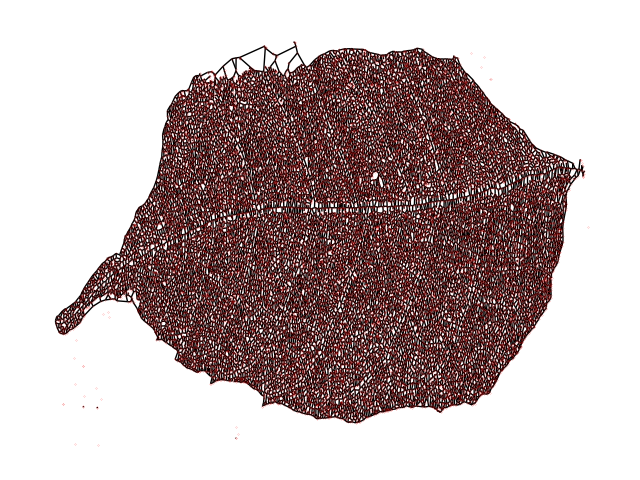

/home/hackerman/anaconda3/envs/leaf-architecture/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/hackerman/anaconda3/envs/leaf-architecture/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/hackerman/anaconda3/envs/leaf-architecture/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/hackerman/anaconda3/envs/leaf-architecture/lib/python3.6/site-packages/matplotlib/r

In [35]:
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos=pos, node_size=0.01)

#basis = nx.cycle_basis(G)
#subgraph_nodes = list(itertools.chain(*basis[:700])) # TODO: how to generate connected subgraphs?
#H = clean_graph(G.subgraph(subgraph_nodes))
#pos = nx.get_node_attributes(H,'pos')
#nx.draw(H, pos=pos, node_size=0.0001)

In [ ]:
nesting_number, nesting_number_no_ext = get_nesting_numbers(H)
print(nesting_number)
print(nesting_number_no_ext)